In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [2]:
df = pd.read_excel('data/risk_register.xlsx')
df.head()

,Probability,Low,Most Likely,Max
0,0.30,650000,1500000,2000000
1,0.40,650000,850000,1500000
2,0.20,2000000,2300000,2600000
3,0.15,2000000,2250000,2600000
4,0.05,650000,1500000,2000000


In [3]:
total_sims = np.zeros(10000)
for i in range(10000):
    sim_cost = np.zeros(df.shape[0])
    for index, row in df.iterrows():
        # randomly pick a number
        prob = np.random.random()
        if prob <= df.iloc[index, 0]:
            rc = df.iloc[index, np.random.choice(range(1, 4))]
        else:
            rc = 0
        sim_cost[index] = rc
    total_sims[i] = sim_cost.sum()
    

(array([9.100e+01, 3.960e+02, 8.530e+02, 1.084e+03, 1.234e+03, 1.224e+03,
        1.149e+03, 1.109e+03, 8.530e+02, 6.800e+02, 4.610e+02, 3.220e+02,
        2.400e+02, 1.370e+02, 8.200e+01, 4.000e+01, 3.200e+01, 9.000e+00,
        3.000e+00, 1.000e+00]),
 array([   50000.,   649250.,  1248500.,  1847750.,  2447000.,  3046250.,
         3645500.,  4244750.,  4844000.,  5443250.,  6042500.,  6641750.,
         7241000.,  7840250.,  8439500.,  9038750.,  9638000., 10237250.,
        10836500., 11435750., 12035000.]),
 <a list of 20 Patch objects>)

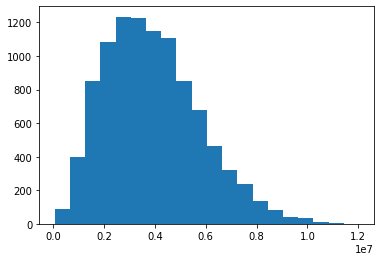

In [4]:
plt.hist(total_sims, bins=20)

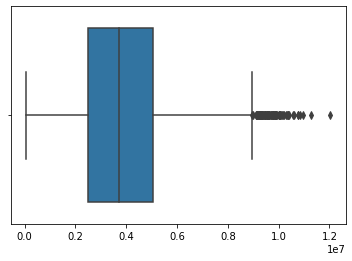

In [5]:
sns.boxplot(x=total_sims)

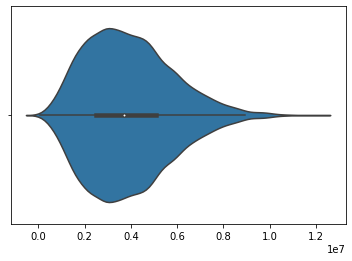

In [6]:
sns.violinplot(x=total_sims)

In [7]:
total_sims = pd.Series(total_sims)
total_sims.describe()

count    1.000000e+04
mean     3.904699e+06
std      1.862143e+06
min      5.000000e+04
25%      2.488750e+06
50%      3.700000e+06
75%      5.070000e+06
max      1.203500e+07
dtype: float64

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurments."""
    # Number of data points: n
    n = len(data)
    
    #x-data for the ECDF : x
    x = np.sort(data)
    #y-data for ecdf : y
    y= np.arange(1, n+1) / n
    return x, y

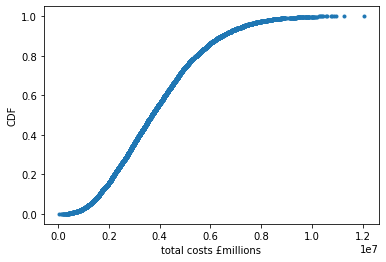

In [9]:
ts_x, ts_y = ecdf(total_sims)
plt.plot(ts_x, ts_y, marker='.', linestyle='none')
plt.xlabel('total costs £millions')
plt.ylabel('CDF')
plt.show()

In [10]:
total_sims.max()

12035000.0

In [12]:
skew(total_sims)

0.5845154464274327

In [15]:
# You need to add 3 to get kurtosis, scipy.stats is using excess kurtosis
kurtosis(total_sims) + 3

3.075362080480388

In [16]:
#excess kurtosis
kurtosis(total_sims)

0.07536208048038784

# Shapiro-Wilk test for significance

In [23]:
from scipy import stats
p_value = stats.shapiro(total_sims.sample(n=5000))[1]
print(p_value)

1.008981517281416e-28


In [24]:
if p_value <= 0.05:
    print('Null hypothesis of normality is rejected.')
else:
    print('Null hypothesis of normality is accepted.')

Null hypothesis of normality is rejected.
